In [2]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.io
from pycirclize import Circos
from pycirclize.utils import calc_group_spaces, ColorCycler

## Loading final results

In [4]:
group_FC = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_level_FC.npy')
rDCM = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_mean_MCI_NCS_rDCM.npy')
spDCM = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_mean_MCI_NCS_spDCM.npy')
rDCM_BMA = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_mean_MCI_NCS_rDCM_BMA.npy')
spDCM_BMA = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_mean_MCI_NCS_spDCM_BMA.npy')
rDCM_BMA95 = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_mean_MCI_NCS_rDCM_BMA95.npy')
spDCM_BMA95 = np.load(r'F:\fMRI_dataset\BIDS\matrices\Group_mean_MCI_NCS_spDCM_BMA95.npy')
#mat = scipy.io.loadmat(r'F:\fMRI_dataset\BIDS\matrices\FCnames_raw.mat')
#Fnames = mat['FCnames_raw']
#Fnames = [item[0] for item in Fnames]
#networks = []
#regions = []
#for name in Fnames:
#    network, region = name.split('.')  # Split the string at the dot
#    networks.append(network)
#    regions.append(region)

In [5]:
#Fnames

regions = ['MPFC', '(L)LP', '(R)rLP', 'PCC', '(L)LPFC', '(L)PPC', '(R)LPFC', '(R)PPC']
network = ['DefaultMode', 'DefaultMode', 'DefaultMode', 'DefaultMode', 'FrontoParietal', 'FrontoParietal', 'FrontoParietal', 'FrontoParietal']
df_spDCM = pd.DataFrame(spDCM, index=regions, columns=regions)
df_rDCM = pd.DataFrame(rDCM, index=regions, columns=regions)
df_spDCM95 = pd.DataFrame(spDCM_BMA95, index=regions, columns=regions)
df_rDCM95 = pd.DataFrame(rDCM_BMA95, index=regions, columns=regions)

In [6]:
#group_FC_flat = group_FC.flatten() 
spDCM_flat = spDCM.flatten()
rDCM_flat = rDCM.flatten()
spDCM_flat_BMA95 = spDCM_BMA95.flatten()
rDCM_flat_BMA95 = rDCM_BMA95.flatten()

## Comparing spDCM with rDCM

In [7]:
spDCM.shape

(8, 8)

In [8]:
rDCM.shape

(8, 8)

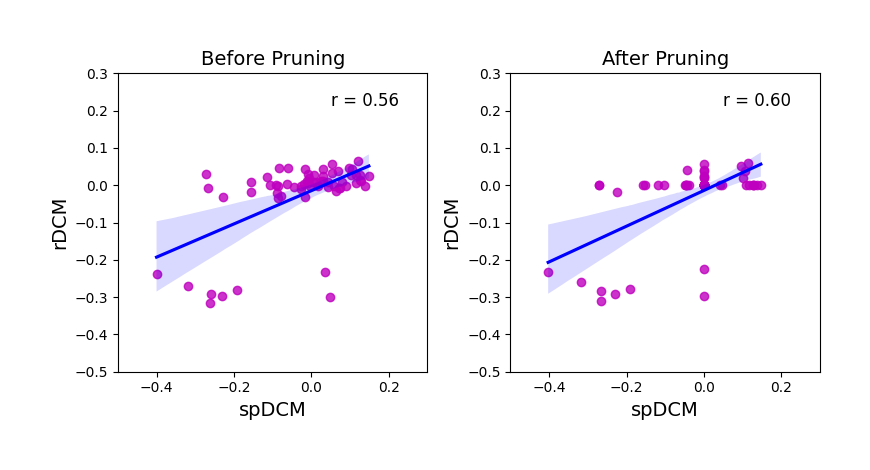

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# corr
corr_before, _ = pearsonr(spDCM_flat, rDCM_flat)
corr_after, _ = pearsonr(spDCM_flat_BMA95, rDCM_flat_BMA95)


# First plot (DCM)
sns.regplot(x=spDCM_flat, y=rDCM_flat, ax=axes[0], 
            scatter_kws={'color': 'm'}, line_kws={'color': 'blue'})
axes[0].set_xlim(-0.5, 0.3)
axes[0].set_ylim(-0.5, 0.3)
axes[0].set_title('Before Pruning', fontsize=14)
axes[0].set_xlabel('spDCM', fontsize=14)
axes[0].set_ylabel('rDCM', fontsize=14)
axes[0].text(0.05, 0.25, f'r = {corr_before:.2f}', ha='left', va='top', fontsize=12, color='black')

# Second plot (DCM_BMA95)
sns.regplot(x=spDCM_flat_BMA95, y=rDCM_flat_BMA95, ax=axes[1], 
            scatter_kws={'color': 'm'}, line_kws={'color': 'blue'})
axes[1].set_xlim(-0.5, 0.3)
axes[1].set_ylim(-0.5, 0.3)
axes[1].set_xlabel('spDCM', fontsize=14)
axes[1].set_ylabel('rDCM', fontsize=14)
axes[1].set_title('After Pruning', fontsize=14)
axes[1].text(0.05, 0.25, f'r = {corr_after:.2f}', ha='left', va='top', fontsize=12, color='black')


plt.tight_layout()
plt.show()

In [17]:


#sns.set_theme(style="white")
#g = sns.jointplot(x=spDCM_flat, y=rDCM_flat,
                  #kind="reg", truncate=False,
                  #xlim=(-0.5, 0.5), ylim=(-0.5, 0.5),
                  #color="m", height=7

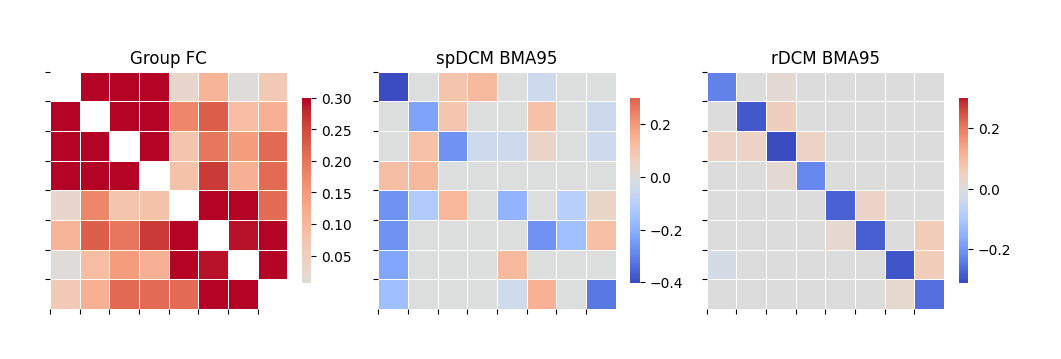

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))


# annot=True, fmt=".1f",
mask = np.triu(np.ones_like(group_FC, dtype=bool))
# Plot 1: group_FC with mask
# mask=mask, 
sns.heatmap(group_FC, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=axes[0], cbar_kws={"shrink": .5})
axes[0].set_title("Group FC")
axes[0].set_xticks(np.arange(0, 8, step=1))
axes[0].set_yticks(np.arange(0, 8, step=1))

# Plot 2: spDCM_BMA95
sns.heatmap(spDCM_BMA95, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=axes[1], cbar_kws={"shrink": .5})
axes[1].set_title("spDCM BMA95")
axes[1].set_xticks(np.arange(0, 8, step=1))
axes[1].set_yticks(np.arange(0, 8, step=1))

# Plot 3: rDCM_BMA95
sns.heatmap(rDCM_BMA95, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=axes[2], cbar_kws={"shrink": .5})
axes[2].set_title("rDCM BMA95")
axes[2].set_xticks(np.arange(0, 8, step=1))
axes[2].set_yticks(np.arange(0, 8, step=1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

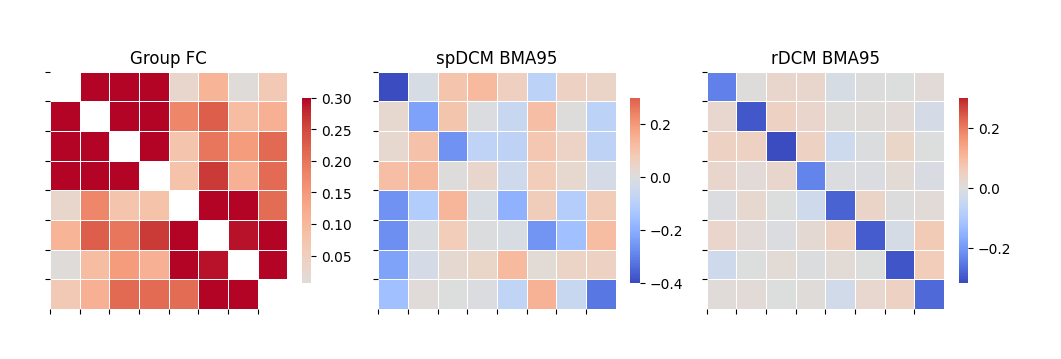

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))


# annot=True, fmt=".1f",
mask = np.triu(np.ones_like(group_FC, dtype=bool))
# Plot 1: group_FC with mask
# mask=mask, 
sns.heatmap(group_FC, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=axes[0], cbar_kws={"shrink": .5})
axes[0].set_title("Group FC")
axes[0].set_xticks(np.arange(0, 8, step=1))
axes[0].set_yticks(np.arange(0, 8, step=1))

# Plot 2: spDCM_BMA95
sns.heatmap(spDCM, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=axes[1], cbar_kws={"shrink": .5})
axes[1].set_title("spDCM")
axes[1].set_xticks(np.arange(0, 8, step=1))
axes[1].set_yticks(np.arange(0, 8, step=1))

# Plot 3: rDCM_BMA95
sns.heatmap(rDCM, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=axes[2], cbar_kws={"shrink": .5})
axes[2].set_title("rDCM")
axes[2].set_xticks(np.arange(0, 8, step=1))
axes[2].set_yticks(np.arange(0, 8, step=1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Circular Plots

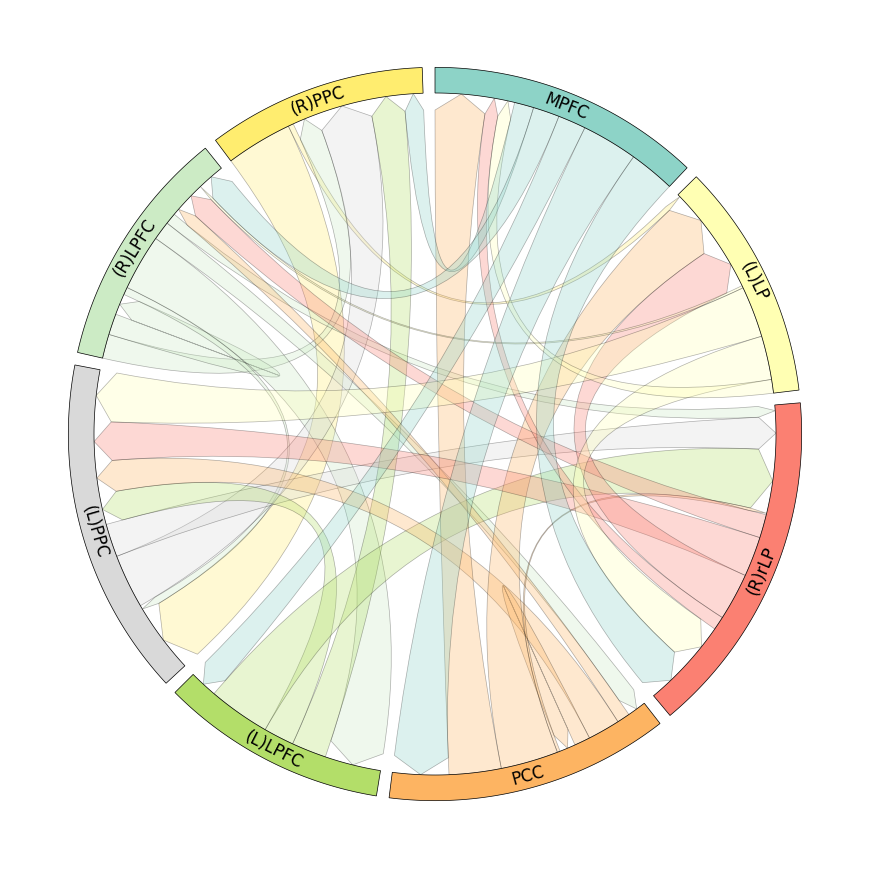

In [27]:
# Define link_kws handler function to customize each link property
def link_kws_handler(from_label: str, to_label: str):
    if from_label in ("C", "G"):
        # Set alpha, zorder values higher than other links for highlighting
        return dict(alpha=0.5, zorder=1.0)
    else:
        return dict(alpha=0.3, zorder=0)





circos = Circos.chord_diagram(
    df_spDCM,
    #start=-265,
    #end=95,
    space=2,
    r_lim=(93, 100),
    cmap="Set3",
    label_kws=dict(r=94, size=12, color="black"),

    link_kws=dict(direction=1, ec="black", lw=0.5),
    
    #link_kws=dict(ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,
)

#print(df_spDCM)
fig = circos.plotfig()

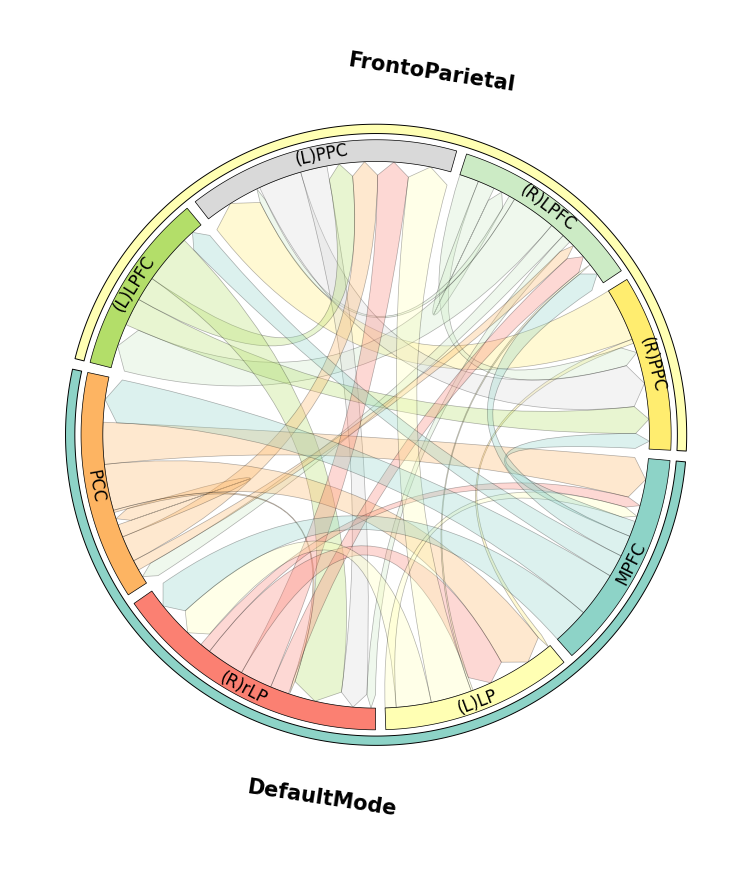

In [65]:
group1, group2 = regions[0:4], regions[4:8]

# FIX: Use absolute sums to define sector widths so size is always > 0
sectors = {name: sum(abs(df_spDCM.loc[name])) for name in regions}

# 3. Calculate spaces
spaces = calc_group_spaces([4, 4], space_bw_group=15, space_in_group=3)

# 4. Initialize Circos
circos = Circos(sectors, space=spaces, start=-265, end=95)
ColorCycler.set_cmap("Set2")
# 5. Plot Sector Tracks
for sector in circos.sectors:
    track = sector.add_track(r_lim=(88, 95))
    # We use a color from a map so it looks like your first example
    track.axis(fc=ColorCycler(), ec="black", lw=0.5)
    track.text(sector.name, r=100, size=10, color="black", adjust_rotation=True)




# 7. Plot Group Headers
group_names = ["DefaultMode", "FrontoParietal"]
# Setting a specific cmap for the group bars
#colors = ["#6acc64", "#4878d0"] # Green for DMN, Blue for FP (example)

# 6. Plot the Chords


#circos = Circos.chord_diagram(
#    df_spDCM,
#    start=-265,
#    end=95,
#    space=3,
#    r_lim=(93, 100),
#    cmap="tab10",
#    label_kws=dict(r=94, size=12, color="white"),
#    link_kws=dict(ec="black", lw=0.5),
#)

circos = Circos.chord_diagram(
    df_spDCM,
    start=-265,
    end=95,
    space=2,
    r_lim=(88, 95),
    cmap="Set3",
    label_kws=dict(r=89, size=12, color="black"),

    link_kws=dict(direction=1, ec="black", lw=0.5),
    
    #link_kws=dict(ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,
)



#ColorCycler.set_cmap("Set3")
for idx, group in enumerate((group1, group2)):
    group_deg_lim = circos.get_group_sectors_deg_lim(group)
    # Draw the outer rectangle for the group
    circos.rect(r_lim=(97, 100), deg_lim=group_deg_lim, fc=ColorCycler(), ec="black", lw=0.7)
    
    # Place the Network Name label
    group_center_deg = sum(group_deg_lim) / 2
    circos.text(group_names[idx], r=115, deg=group_center_deg, adjust_rotation=True, size=15, weight="bold")

#ColorCycler.set_cmap("tab10")
#for idx, group in enumerate((group1, group2)):
#    group_deg_lim = circos.get_group_sectors_deg_lim(group)
#    circos.rect(r_lim=(97, 100), deg_lim=group_deg_lim, fc=ColorCycler(), ec="black", lw=0.5)
#    group_center_deg = sum(group_deg_lim) / 2
#    circos.text(f"Group{idx}", r=105, deg=group_center_deg, adjust_rotation=True)




#print(df_spDCM)
fig = circos.plotfig()



In [83]:

# 1. Setup Data and Metadata
regions = ['MPFC', '(L)LP', '(R)rLP', 'PCC', '(L)LPFC', '(L)PPC', '(R)LPFC', '(R)PPC']
group1, group2 = regions[0:4], regions[4:8]
group_names = ["DefaultMode", "FrontoParietal"]

# Dictionary to map titles to your dataframes
data_map = {
    "spDCM": df_spDCM,
    "rDCM": df_rDCM,
}

# 2. Define the plotting function based on your polished style

def plot_network_chord(df, ax, title):
    # Calculate sector sizes (sum of absolute values to avoid ValueError)
    sectors = {name: sum(abs(df.loc[name])) for name in regions}
    
    # Calculate spaces (15 deg between groups, 3 deg within)
    spaces = calc_group_spaces([4, 4], space_bw_group=15, space_in_group=3)
    
    # Initialize Circos on the specific subplot axis
    circos = Circos(sectors, space=spaces, start=-265, end=95)
    
    # Plot Sector Tracks
    ColorCycler.set_cmap("Set3")
    for sector in circos.sectors:
        track = sector.add_track(r_lim=(93, 100))
        track.axis(fc=ColorCycler(), ec="black", lw=0.5)
        track.text(sector.name, r=105, size=12, color="black", adjust_rotation=True)

    # Plot the Chord Links
    # Note: Using the internal chord_diagram method to maintain 'spaces'
    
    #circos = Circos.chord_diagram(
    #df,
    #start=-265,
    #end=95,
    #space=3,
    #r_lim=(93, 100),
    #cmap="tab10",
    #label_kws=dict(r=94, size=12, color="white"),
    #link_kws=dict(ec="black", lw=0.5),
    #)
    circos = Circos.chord_diagram(
                    df,
                    start=-265,
                    end=95,
                    space=2,
                    r_lim=(88, 95),
                    cmap="Set3",
                    label_kws=dict(r=89, size=12, color="black"),
                
                    link_kws=dict(direction=1, ec="black", lw=0.5),
                    
                    #link_kws=dict(ec="black", lw=0.5),
                    link_kws_handler=link_kws_handler,
                    )
                
    # Plot Group Headers
    ColorCycler.set_cmap("tab10")
    #for idx, group in enumerate((group1, group2)):
    #    group_deg_lim = circos.get_group_sectors_deg_lim(group)
    #    circos.rect(r_lim=(115, 120), deg_lim=group_deg_lim, fc=ColorCycler(), ec="black", lw=0.7)
    #    
    #    group_center_deg = sum(group_deg_lim) / 2
    #    circos.text(group_names[idx], r=135, deg=group_center_deg, adjust_rotation=False, size=12, weight="bold")
#
    for idx, group in enumerate((group1, group2)):
        group_deg_lim = circos.get_group_sectors_deg_lim(group)
        # Draw the outer rectangle for the group
        circos.rect(r_lim=(97, 100), deg_lim=group_deg_lim, fc=ColorCycler(), ec="black", lw=0.7)
        
        # Place the Network Name label
        group_center_deg = sum(group_deg_lim) / 2
        circos.text(group_names[idx], r=105, deg=group_center_deg, adjust_rotation=True, size=15, weight="bold")


    
    
    # Finalize the plot on the axis
    circos.plotfig(ax=ax)
    ax.set_title(title, loc="left", x=0, pad=50, size=18, weight="bold")


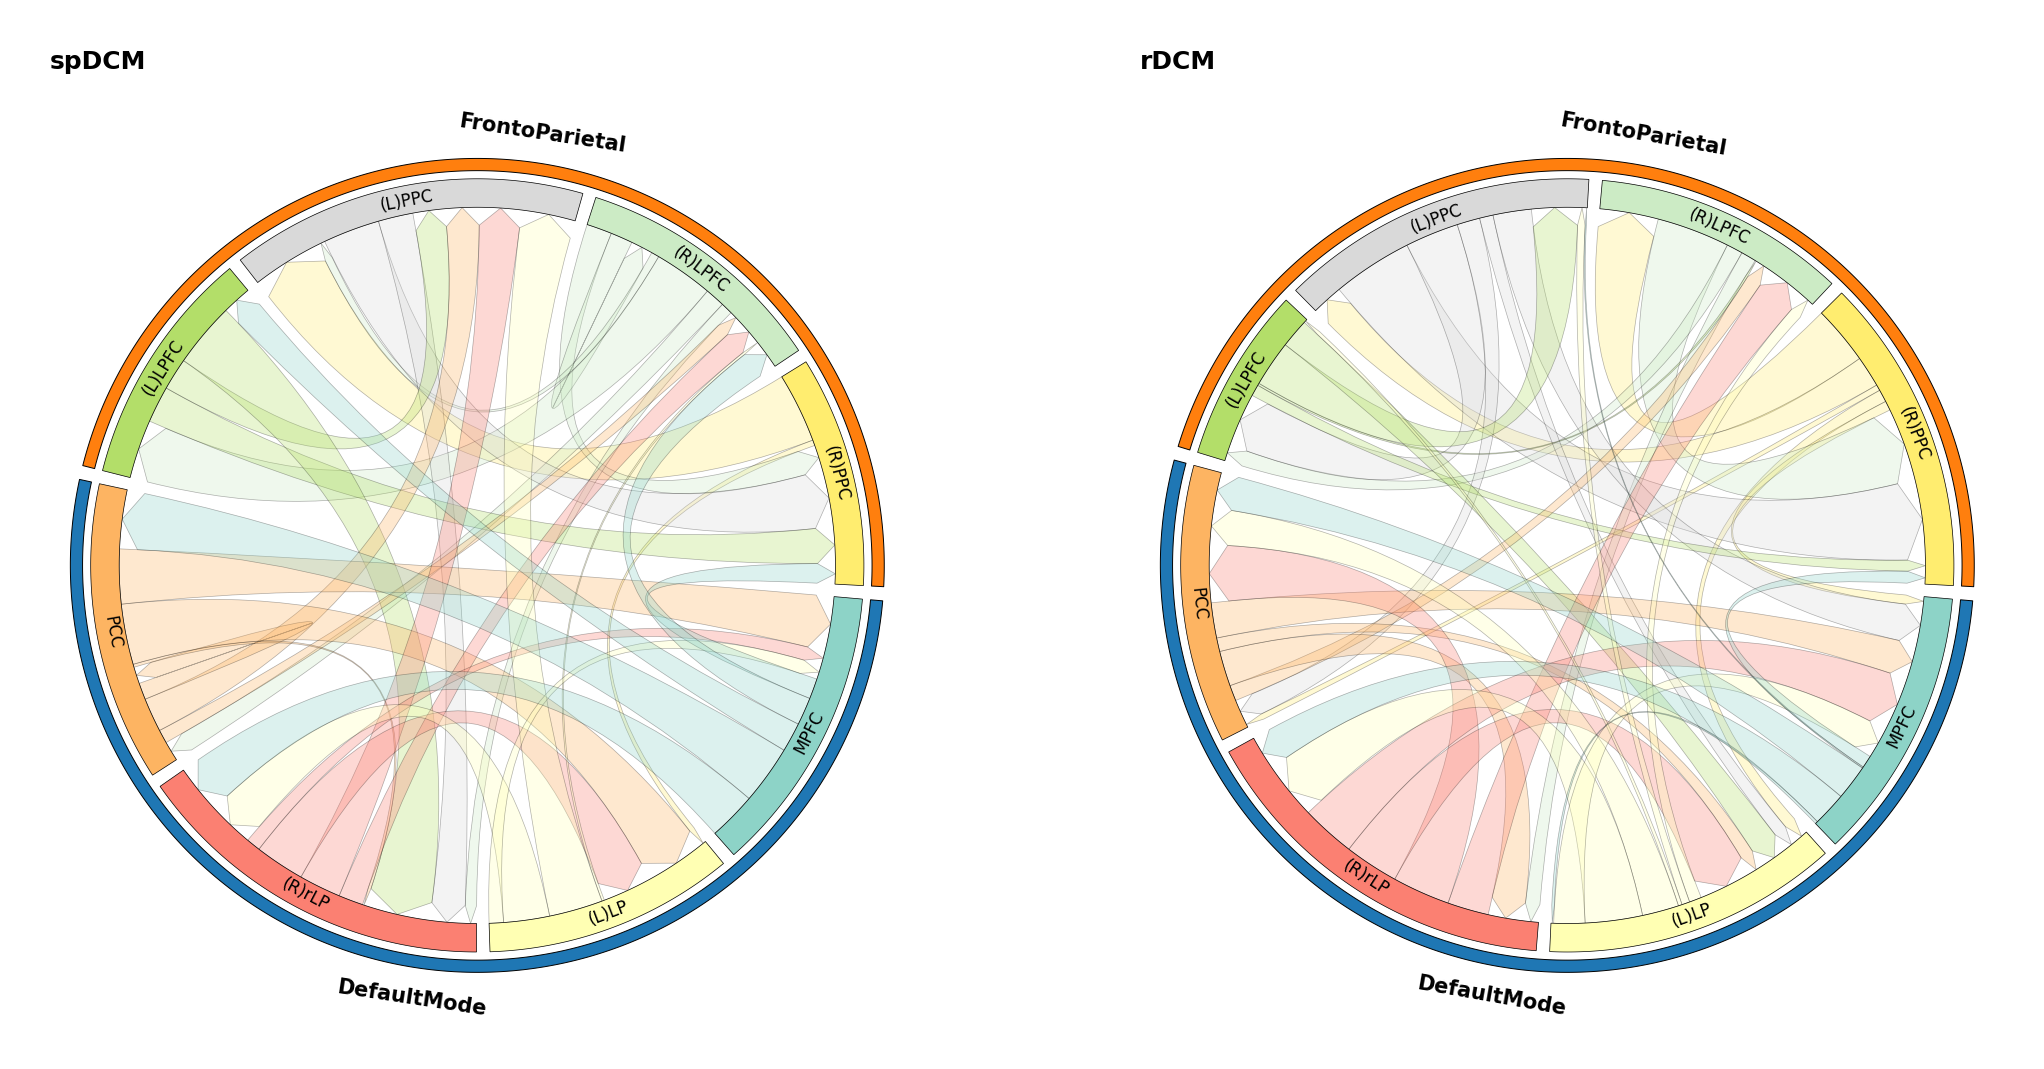

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(22, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

# 4. Generate the plots
for i, (title, df) in enumerate(data_map.items()):
    plot_network_chord(df, axes[i], title)


fig.tight_layout()

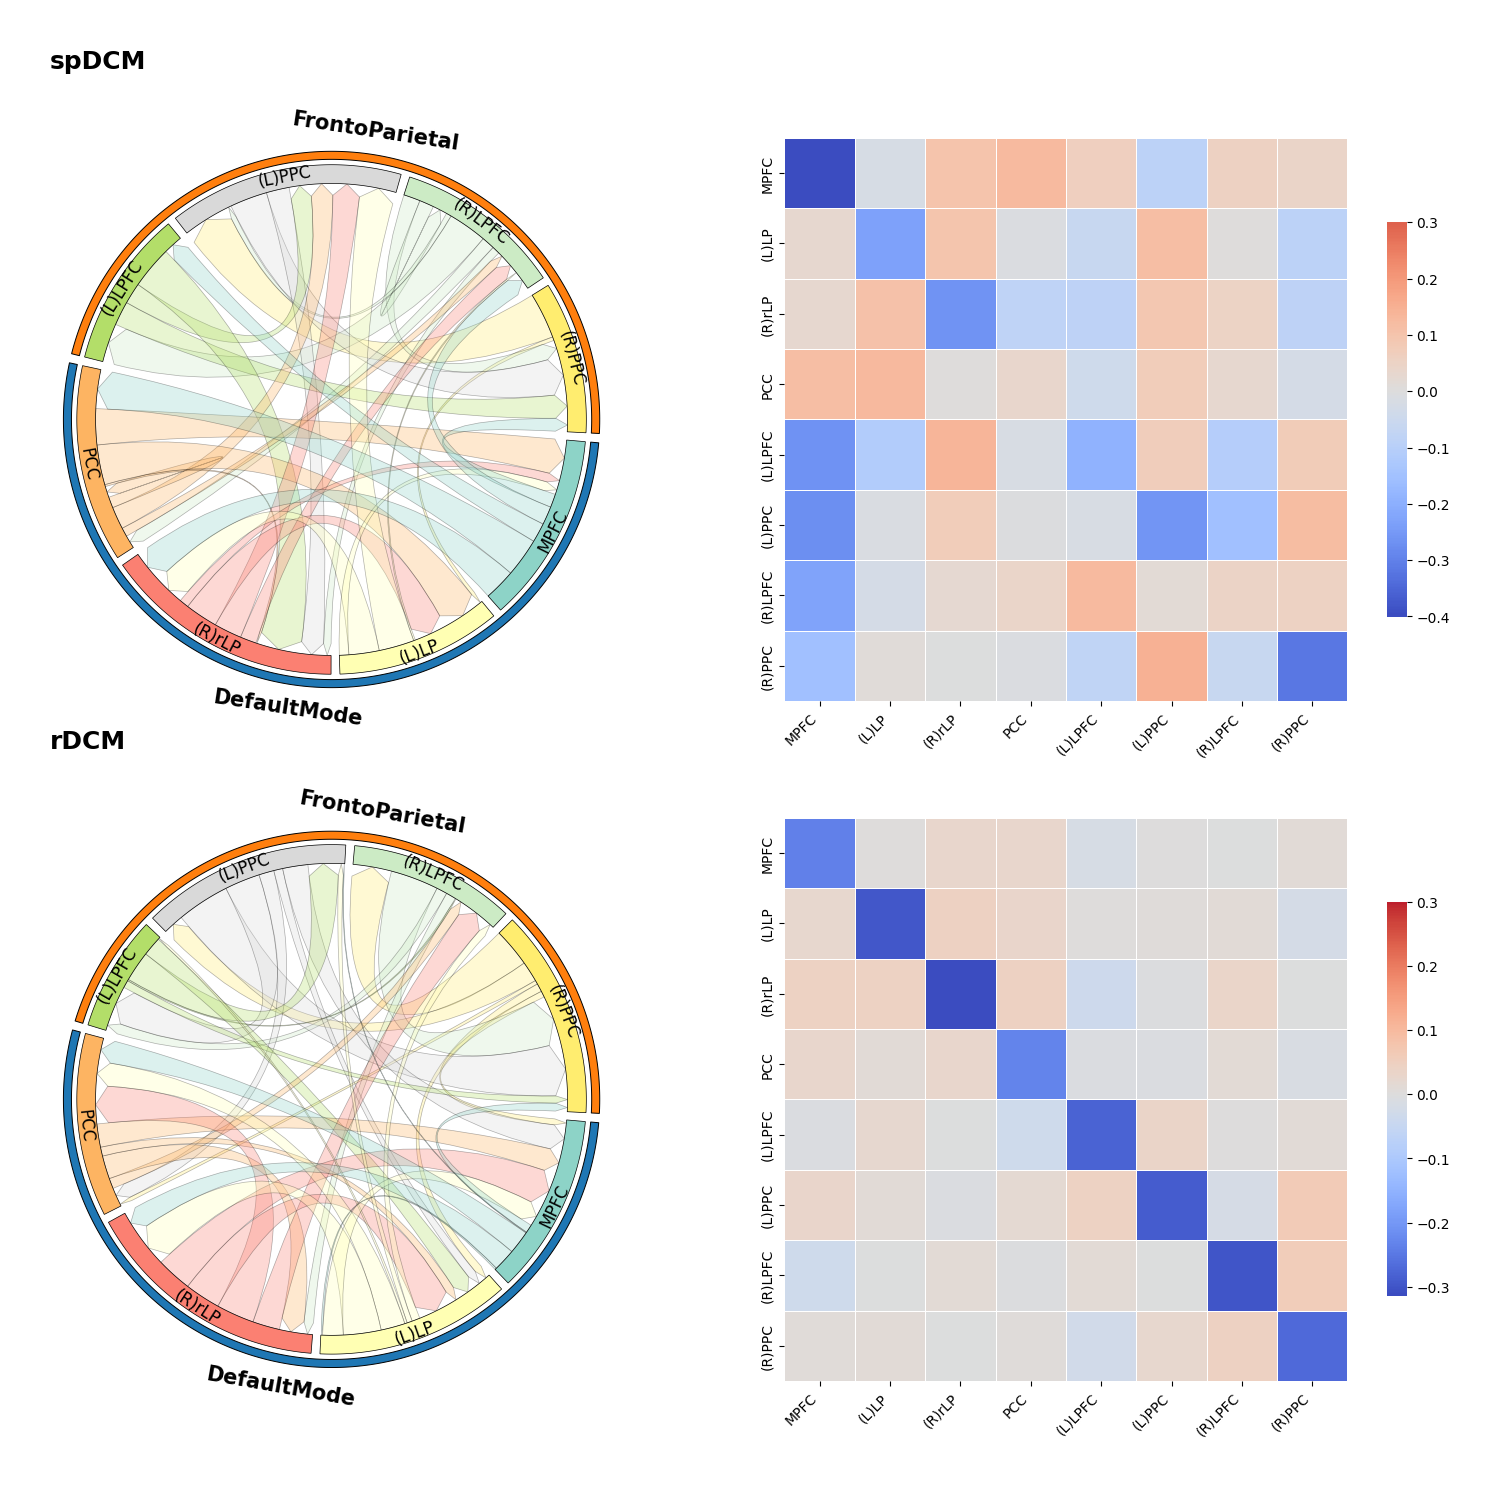

In [115]:

fig = plt.figure(figsize=(16, 14), dpi=100)

# 2. Define Subplot Layout (2 rows, 3 columns)
# Chords will take columns 1 & 2 | Heatmaps will take column 3
ax_chord1 = fig.add_subplot(221, polar=True) # spDCM Chord
ax_chord2 = fig.add_subplot(223, polar=True) # rDCM Chord
#ax_chord3 = fig.add_subplot(234, polar=True) # spDCM95 Chord
#ax_chord4 = fig.add_subplot(235, polar=True) # rDCM95 Chord

ax_hm1 = fig.add_subplot(222) # spDCM Heatmap (Standard/Cartesian)
ax_hm2 = fig.add_subplot(224) # rDCM Heatmap (Standard/Cartesian)

chord_axes = [ax_chord1, ax_chord2, ax_chord3, ax_chord4]
heatmap_axes = [ax_hm1, ax_hm2]

# 3. Generate Chord Diagrams (using your data_map)
# Assuming data_map = {"spDCM": df1, "rDCM": df2, "spDCM 95%": df3, "rDCM 95%": df4}
for i, (title, df) in enumerate(data_map.items()):
    plot_network_chord(df, chord_axes[i], title)

# 4. Plot Heatmap 1: spDCM
sns.heatmap(df_spDCM, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=ax_hm1, 
            cbar_kws={"shrink": .7}, xticklabels=regions, yticklabels=regions)
#ax_hm1.set_title("spDCM Connectivity Matrix", loc="left", x=-0.1, size=18, weight="bold", pad=20)

# 5. Plot Heatmap 2: rDCM
sns.heatmap(df_rDCM, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, ax=ax_hm2, 
            cbar_kws={"shrink": .7}, xticklabels=regions, yticklabels=regions)
#ax_hm2.set_title("rDCM Connectivity Matrix", loc="left", x=-0.1, size=18, weight="bold", pad=20)

# 6. Fine-tune layout
# Rotate heatmap labels for better readability
plt.setp(ax_hm1.get_xticklabels(), rotation=45, ha="right")
plt.setp(ax_hm2.get_xticklabels(), rotation=45, ha="right")

fig.tight_layout(w_pad=0.0, h_pad=0.0)
plt.show()